<a href="https://colab.research.google.com/github/sena1bayram/Water_Quality_Clustring/blob/main/Water_Quality_K%C3%BCmeleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date  Salinity (ppt)  DissolvedOxygen (mg/L)   pH  SecchiDepth (m)  \
0  1989-05-11             NaN                     NaN  7.5              0.3   
1  1989-05-18             NaN                    12.0  7.5              0.2   
2  1989-05-25             NaN                     NaN  8.0              0.4   
3  1989-06-01             NaN                    12.0  8.0              0.4   
4  1989-07-11             NaN                     NaN  8.5              0.3   

   WaterDepth (m)  WaterTemp (C)  AirTemp (C)  
0             0.9           17.0   -17.777778  
1             0.6           17.5    20.500000  
2             0.8           23.0    25.000000  
3             0.9           25.5    29.000000  
4             0.9           28.5    28.000000  
Date                      5
Salinity (ppt)            0
DissolvedOxygen (mg/L)    0
pH                        0
SecchiDepth (m)           0
WaterDepth (m)            0
WaterTemp (C)             0
AirTemp (C)               0
dtype: int64


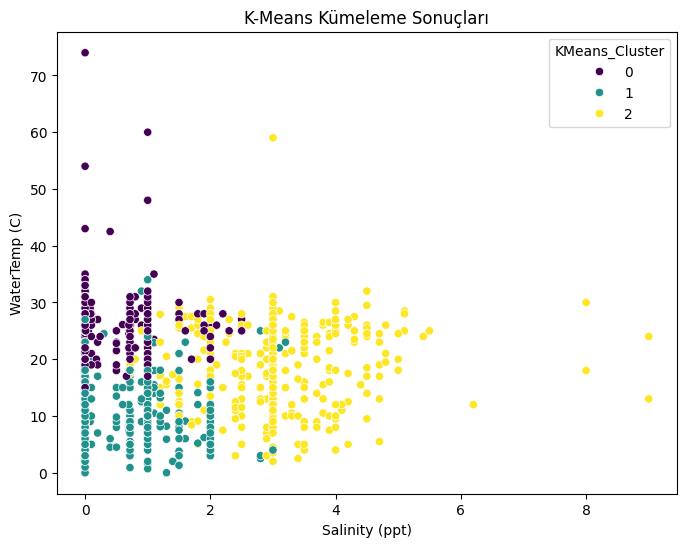

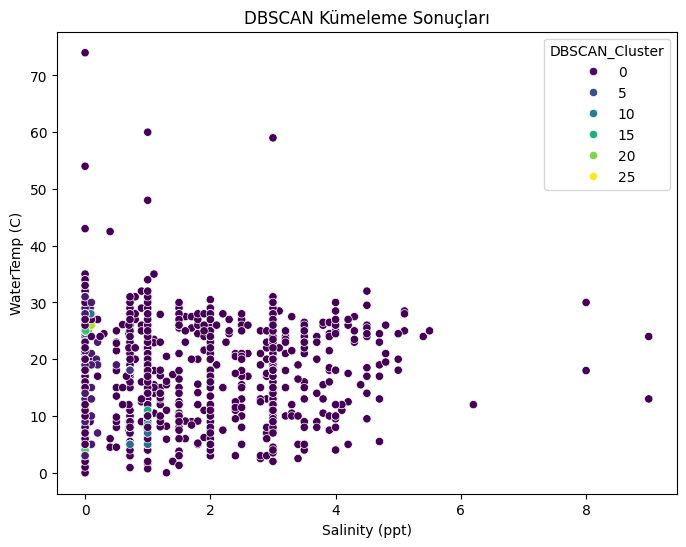

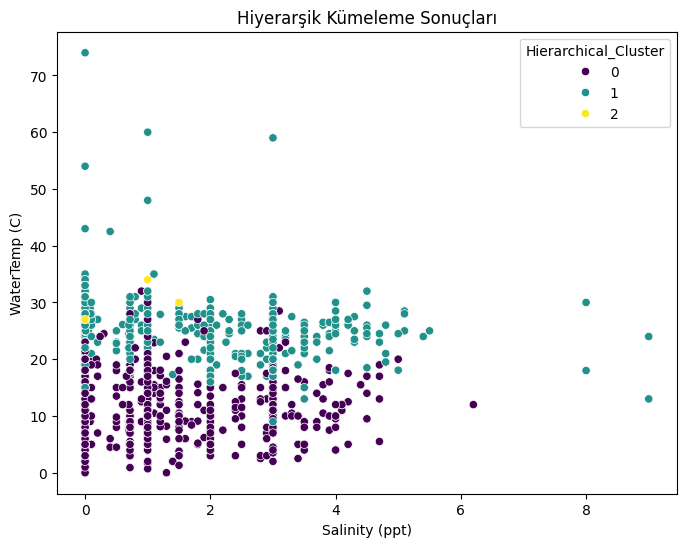

In [ ]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükleyin
data = pd.read_csv('waterquality.csv')  # Dosya yolunu uygun şekilde değiştirin

# Veriyi kontrol et
print(data.head())

# Eksik verileri sütun ortalamaları ile doldurma
data_filled = data.copy()

# Sayısal sütunları seçip, eksik değerleri ortalama ile dolduruyoruz
numerical_columns = ['Salinity (ppt)', 'DissolvedOxygen (mg/L)', 'pH', 'SecchiDepth (m)',
                     'WaterDepth (m)', 'WaterTemp (C)', 'AirTemp (C)']

for column in numerical_columns:
    data_filled[column] = data_filled[column].fillna(data_filled[column].mean())

# Veri setinde eksik değer kalmadığını kontrol et
print(data_filled.isnull().sum())

# Veriyi normalize etme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filled[numerical_columns])

# K-Means Kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)  # Küme sayısını ihtiyaca göre ayarlayın
kmeans.fit(scaled_data)
data_filled['KMeans_Cluster'] = kmeans.labels_

# K-Means sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_filled['Salinity (ppt)'], y=data_filled['WaterTemp (C)'], hue=data_filled['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Salinity (ppt)')
plt.ylabel('WaterTemp (C)')
plt.show()

# DBSCAN Kümeleme
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parametreleri ihtiyaca göre ayarlayın
dbscan_labels = dbscan.fit_predict(scaled_data)
data_filled['DBSCAN_Cluster'] = dbscan_labels

# DBSCAN sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_filled['Salinity (ppt)'], y=data_filled['WaterTemp (C)'], hue=data_filled['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Kümeleme Sonuçları')
plt.xlabel('Salinity (ppt)')
plt.ylabel('WaterTemp (C)')
plt.show()

# Hiyerarşik Kümeleme (Agglomerative Clustering)
hierarchical = AgglomerativeClustering(n_clusters=3)  # Küme sayısını ihtiyaca göre ayarlayın
hierarchical_labels = hierarchical.fit_predict(scaled_data)
data_filled['Hierarchical_Cluster'] = hierarchical_labels

# Hiyerarşik Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_filled['Salinity (ppt)'], y=data_filled['WaterTemp (C)'], hue=data_filled['Hierarchical_Cluster'], palette='viridis')
plt.title('Hiyerarşik Kümeleme Sonuçları')
plt.xlabel('Salinity (ppt)')
plt.ylabel('WaterTemp (C)')
plt.show()



Optimizasyon sonucu:

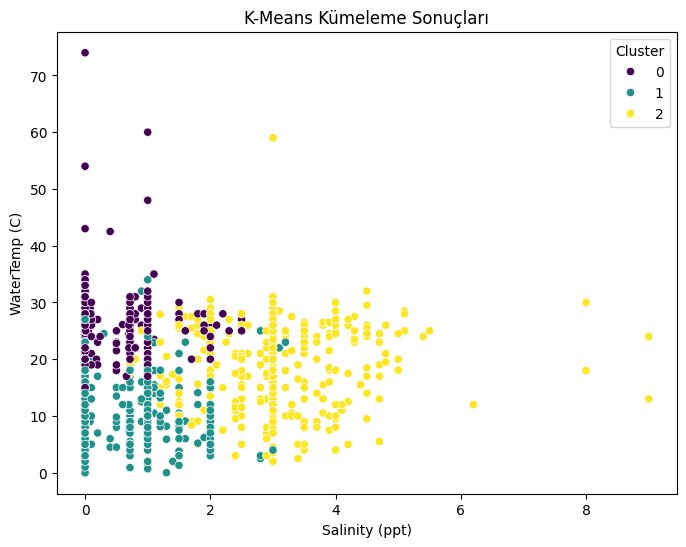

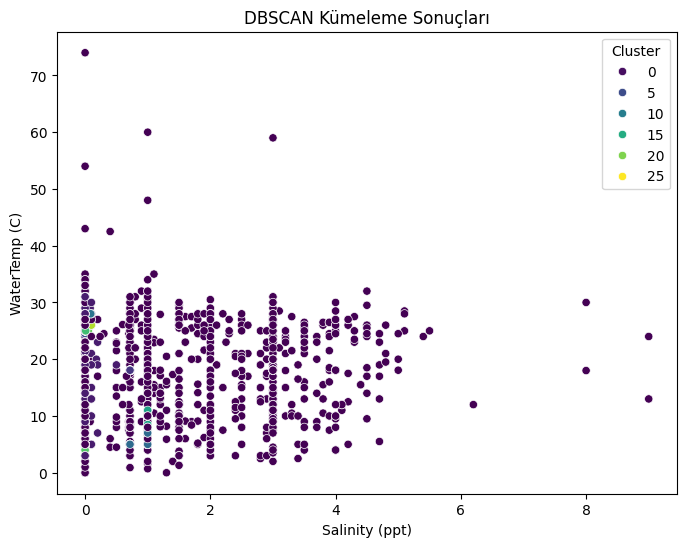

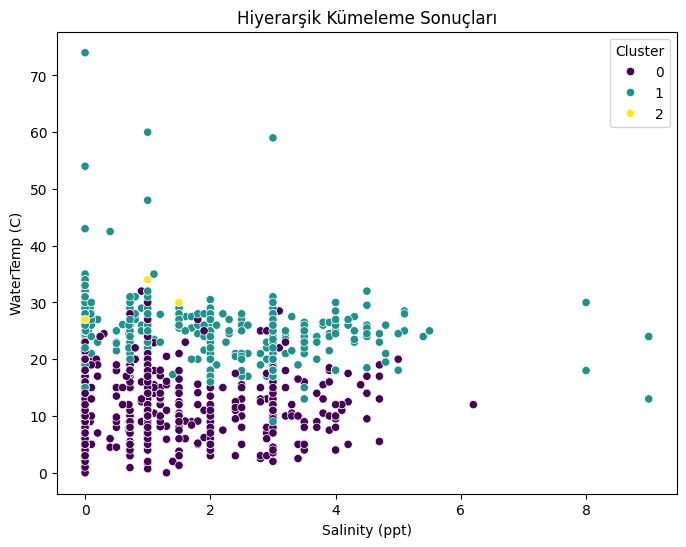

In [ ]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükleme
def load_data(file_path):
    return pd.read_csv("waterquality.csv")

# Eksik verileri doldurmak
def fill_missing_data(data, numerical_columns):
    for column in numerical_columns:
        data[column] = data[column].fillna(data[column].mean())
    return data

# Veriyi normalleştirme
def normalize_data(data, numerical_columns):
    scaler = StandardScaler()
    return scaler.fit_transform(data[numerical_columns])

# Kümeleme algoritmalarını uygula
def apply_clustering(data, method, n_clusters=3, eps=0.5, min_samples=5):
    if method == 'KMeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(data)
    elif method == 'DBSCAN':
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data)
    elif method == 'Hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(data)
    return labels

# Kümeleme sonuçlarını görselleştirme
def visualize_clustering(data, x_column, y_column, labels, method_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[x_column], y=data[y_column], hue=labels, palette='viridis')
    plt.title(f'{method_name} Kümeleme Sonuçları')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend(title='Cluster')
    plt.show()

# Ana fonksiyon
def main():
    # Veri dosyasını yükle
    file_path = 'water_quality.csv'  # Dosya yolunu değiştirin
    data = load_data(file_path)

    # Sayısal sütunları belirle
    numerical_columns = ['Salinity (ppt)', 'DissolvedOxygen (mg/L)', 'pH', 'SecchiDepth (m)',
                         'WaterDepth (m)', 'WaterTemp (C)', 'AirTemp (C)']

    # Eksik verileri doldur
    data_filled = fill_missing_data(data.copy(), numerical_columns)

    # Veriyi normalize et
    scaled_data = normalize_data(data_filled, numerical_columns)

    # K-Means Kümeleme
    kmeans_labels = apply_clustering(scaled_data, 'KMeans', n_clusters=3)
    data_filled['KMeans_Cluster'] = kmeans_labels
    visualize_clustering(data_filled, 'Salinity (ppt)', 'WaterTemp (C)', kmeans_labels, 'K-Means')

    # DBSCAN Kümeleme
    dbscan_labels = apply_clustering(scaled_data, 'DBSCAN', eps=0.5, min_samples=5)
    data_filled['DBSCAN_Cluster'] = dbscan_labels
    visualize_clustering(data_filled, 'Salinity (ppt)', 'WaterTemp (C)', dbscan_labels, 'DBSCAN')

    # Hiyerarşik Kümeleme
    hierarchical_labels = apply_clustering(scaled_data, 'Hierarchical', n_clusters=3)
    data_filled['Hierarchical_Cluster'] = hierarchical_labels
    visualize_clustering(data_filled, 'Salinity (ppt)', 'WaterTemp (C)', hierarchical_labels, 'Hiyerarşik')

# Ana fonksiyonu çalıştır
if __name__ == '__main__':
    main()


Yeni Optimizasyon

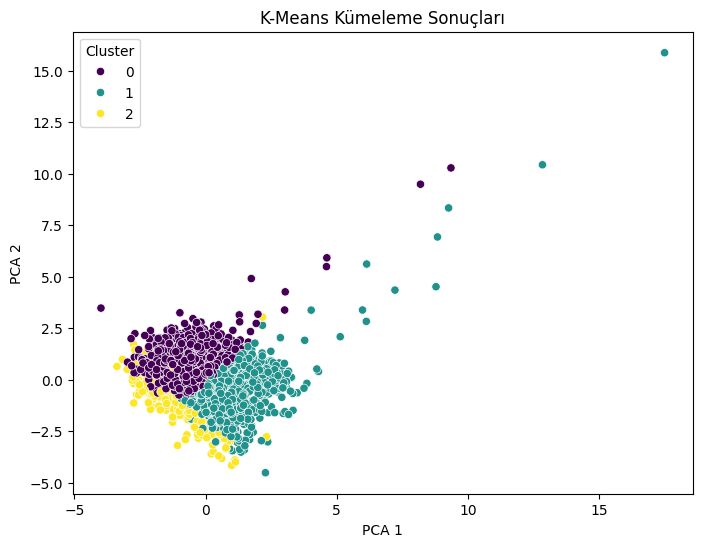

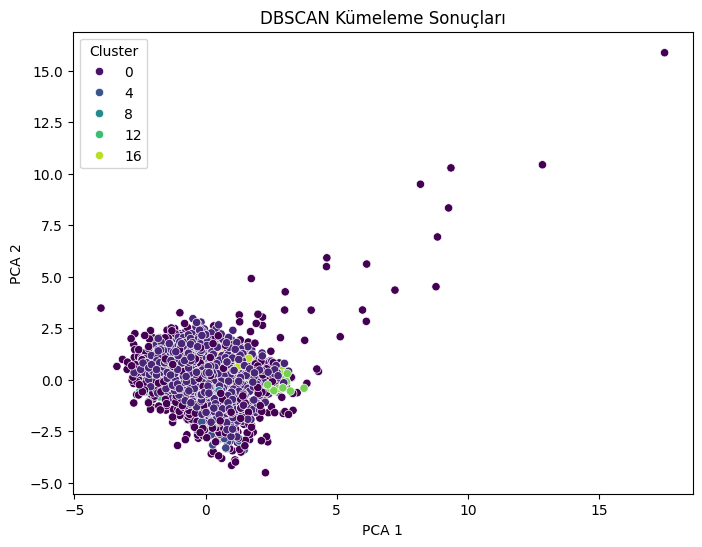

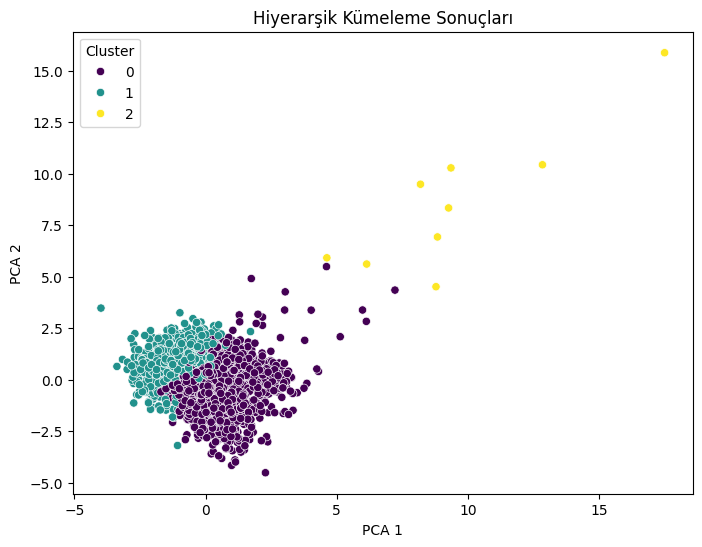

In [ ]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükleme
def load_data(file_path):
    return pd.read_csv("waterquality.csv")

# Eksik verileri doldurmak
def fill_missing_data(data, numerical_columns, method='mean'):

    if method == 'mean':
        for column in numerical_columns:
            data[column] = data[column].fillna(data[column].mean())
    elif method == 'forward':
        data[numerical_columns] = data[numerical_columns].fillna(method='ffill')
    elif method == 'backward':
        data[numerical_columns] = data[numerical_columns].fillna(method='bfill')
    return data

# Veriyi normalleştirme
def normalize_data(data, numerical_columns):

    scaler = StandardScaler()
    return scaler.fit_transform(data[numerical_columns])

# Kümeleme algoritmalarını uygula
def apply_clustering(data, method, n_clusters=3, eps=0.5, min_samples=5, max_iter=300, init='k-means++', linkage='ward'):

    if method == 'KMeans':
        # KMeans optimizasyonu (init parametresi ile farklı başlangıç noktası seçenekleri)
        model = KMeans(n_clusters=n_clusters, max_iter=max_iter, init=init, random_state=42)
        labels = model.fit_predict(data)

    elif method == 'DBSCAN':
        # DBSCAN optimizasyonu (eps ve min_samples parametreleri ile ayar)
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data)

    elif method == 'Hierarchical':
        # Hiyerarşik kümeleme optimizasyonu (linkage parametresi ile farklı bağlantı türleri)
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(data)

    return labels

# PCA ile boyut indirgeme
def reduce_dimensions(data, n_components=2):

    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Kümeleme sonuçlarını görselleştirme
def visualize_clustering(data, labels, method_name, n_components=2):

    # PCA ile boyut indirgeme
    pca_data = reduce_dimensions(data, n_components)

    # Veriyi görselleştir
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='viridis')
    plt.title(f'{method_name} Kümeleme Sonuçları')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.show()

# Ana fonksiyon
def main(file_path='waterquality.csv'):

    # Veri dosyasını yükle
    data = load_data(file_path)

    # Sayısal sütunları belirle
    numerical_columns = ['Salinity (ppt)', 'DissolvedOxygen (mg/L)', 'pH', 'SecchiDepth (m)',
                         'WaterDepth (m)', 'WaterTemp (C)', 'AirTemp (C)']

    # Eksik verileri doldur
    data_filled = fill_missing_data(data.copy(), numerical_columns, method='mean')

    # Veriyi normalize et
    scaled_data = normalize_data(data_filled, numerical_columns)

    # K-Means Kümeleme (optimize edilmiş parametrelerle)
    kmeans_labels = apply_clustering(scaled_data, 'KMeans', n_clusters=3, max_iter=500, init='k-means++')
    data_filled['KMeans_Cluster'] = kmeans_labels
    visualize_clustering(scaled_data, kmeans_labels, 'K-Means')

    # DBSCAN Kümeleme (optimize edilmiş parametrelerle)
    dbscan_labels = apply_clustering(scaled_data, 'DBSCAN', eps=0.7, min_samples=5)
    data_filled['DBSCAN_Cluster'] = dbscan_labels
    visualize_clustering(scaled_data, dbscan_labels, 'DBSCAN')

    # Hiyerarşik Kümeleme (optimize edilmiş parametrelerle)
    hierarchical_labels = apply_clustering(scaled_data, 'Hierarchical', n_clusters=3, linkage='ward')
    data_filled['Hierarchical_Cluster'] = hierarchical_labels
    visualize_clustering(scaled_data, hierarchical_labels, 'Hiyerarşik')

# Ana fonksiyonu çalıştır
if __name__ == '__main__':
    main()  # Burada dosya yolunu parametre olarak verebilirsiniz


K-Fold Cross-Validation ile Kümeleme Uygulaması

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Veri setini yükleme
def load_data(file_path):
    return pd.read_csv("waterquality.csv")

# Eksik verileri doldurmak
def fill_missing_data(data, numerical_columns):
    for column in numerical_columns:
        data[column] = data[column].fillna(data[column].mean())
    return data

# Veriyi normalleştirme
def normalize_data(data, numerical_columns):
    scaler = StandardScaler()
    return scaler.fit_transform(data[numerical_columns])

# Kümeleme algoritmalarını uygula
def apply_clustering(data, method, n_clusters=3, eps=0.5, min_samples=5, max_iter=300, init='k-means++', linkage='ward'):
    if method == 'KMeans':
        model = KMeans(n_clusters=n_clusters, max_iter=max_iter, init=init, random_state=42)
        labels = model.fit_predict(data)
    elif method == 'DBSCAN':
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data)
    elif method == 'Hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(data)
    return labels

# PCA ile boyut indirgeme
def reduce_dimensions(data, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# K-Fold Cross Validation
def k_fold_cross_validation(data, method, numerical_columns, k=5, n_clusters=3, eps=0.5, min_samples=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    silhouette_scores = []

    # K-Fold döngüsü
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # Sayısal sütunları al ve eksik verileri doldur
        train_data_filled = fill_missing_data(train_data.copy(), numerical_columns)
        test_data_filled = fill_missing_data(test_data.copy(), numerical_columns)

        # Veriyi normalize et
        train_scaled = normalize_data(train_data_filled, numerical_columns)
        test_scaled = normalize_data(test_data_filled, numerical_columns)

        # Kümeleme algoritmasını uygula
        labels = apply_clustering(train_scaled, method, n_clusters=n_clusters, eps=eps, min_samples=min_samples)

        # Silhouette skoru hesapla
        silhouette_avg = silhouette_score(train_scaled, labels)
        silhouette_scores.append(silhouette_avg)

    return np.mean(silhouette_scores)

# Ana fonksiyon
def main(file_path='waterquality.csv'):
    data = load_data(file_path)

    # Sayısal sütunları belirle
    numerical_columns = ['Salinity (ppt)', 'DissolvedOxygen (mg/L)', 'pH', 'SecchiDepth (m)',
                         'WaterDepth (m)', 'WaterTemp (C)', 'AirTemp (C)']

    # K-Fold Cross Validation ile Kümeleme Algoritmalarını Test Et
    methods = ['KMeans', 'DBSCAN', 'Hierarchical']
    for method in methods:
        silhouette_avg = k_fold_cross_validation(data, method, numerical_columns, k=5, n_clusters=3, eps=0.7, min_samples=5)
        print(f"{method} Kümeleme Silhouette Skoru (K-Fold CV): {silhouette_avg:.4f}")

# Ana fonksiyonu çalıştır
if __name__ == '__main__':
    main()  # Burada dosya yolunu parametre olarak verebilirsiniz


KMeans Kümeleme Silhouette Skoru (K-Fold CV): 0.2349
DBSCAN Kümeleme Silhouette Skoru (K-Fold CV): -0.2790
Hierarchical Kümeleme Silhouette Skoru (K-Fold CV): 0.2127
